<a href="https://colab.research.google.com/github/Emelsmsk/hierarchial_youth_smoking/blob/main/hierarchial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
df = pd.read_csv("youth_smoking_drug_data.csv")

In [ ]:
df

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023,15-19,Male,49.17,10.21,Low,7,Yes,4,5,No,7,Yes,2,9
9996,2020,80+,Female,48.00,30.85,Middle,8,Yes,8,8,No,4,Yes,8,9
9997,2021,25-29,Both,47.62,39.54,High,1,No,7,2,Yes,1,No,5,10
9998,2022,40-49,Male,9.37,11.64,Low,7,No,10,1,No,2,Yes,10,4


In [ ]:
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


In [ ]:
df.dtypes

,0
Year,int64
Age_Group,object
Gender,object
Smoking_Prevalence,float64
Drug_Experimentation,float64
Socioeconomic_Status,object
Peer_Influence,int64
School_Programs,object
Family_Background,int64
Mental_Health,int64


In [ ]:
df.columns

Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')

In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)


Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [ ]:
!pip install scipy
from scipy.cluster.hierarchy import linkage
Z = linkage(df_scaled, method='ward')

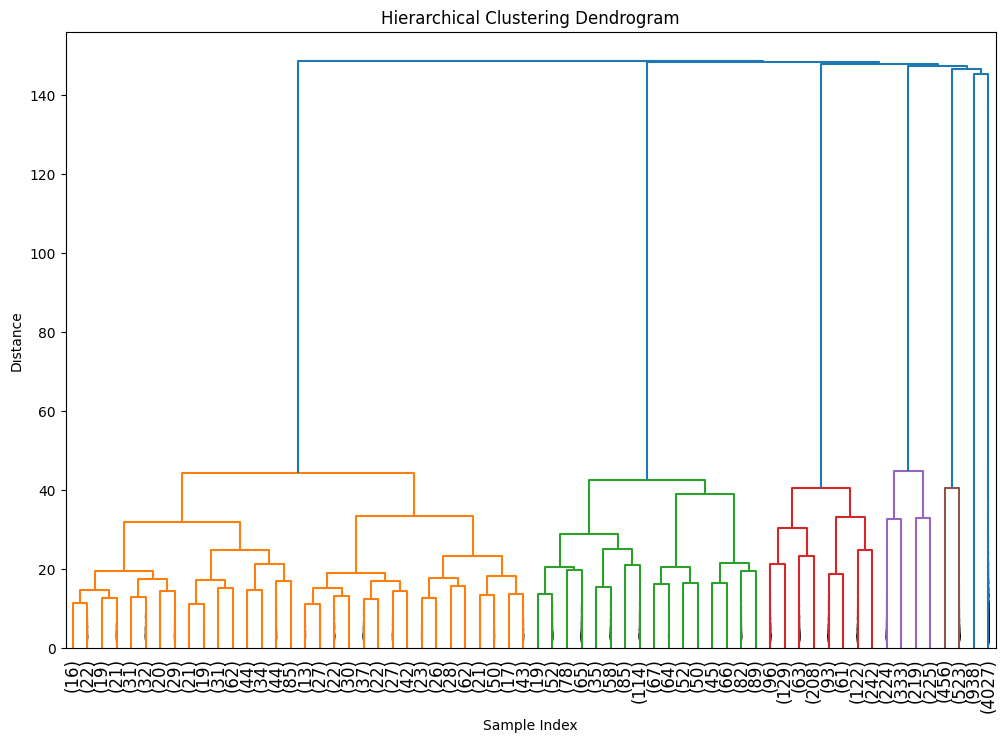

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Dıstance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 10
df['Cluster'] = fcluster(Z, k, criterion='maxclust')
df_encoded['Cluster'] = fcluster(Z, k, criterion='maxclust')

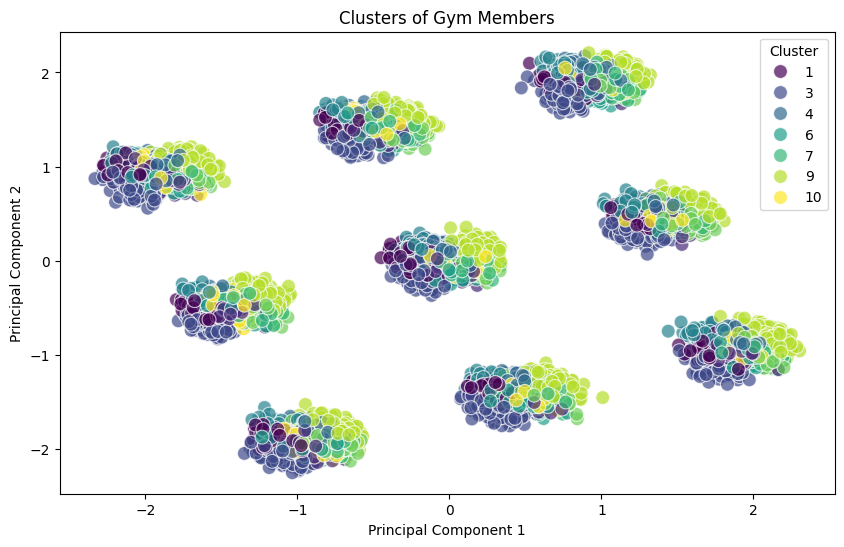

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Gym Members')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
cluster_analysis = df_encoded.groupby('Cluster').mean()
print(cluster_analysis)

                Year  Smoking_Prevalence  ...  Access_to_Counseling_Yes  Substance_Education_Yes
Cluster                                   ...                                                   
1        2021.929412           27.012245  ...                  0.500980                 0.487255
2        2022.013712           27.671166  ...                  0.469148                 0.503428
3        2022.011834           27.444990  ...                  0.479290                 0.505917
4        2021.950050           27.292827  ...                  0.496503                 0.494505
5        2021.951992           27.398059  ...                  0.484168                 0.522983
6        2022.036247           27.250597  ...                  0.496802                 0.489339
7        2022.002055           27.282497  ...                  0.485098                 0.485098
8        2022.032000           27.520760  ...                  0.509000                 0.518000
9        2022.076555          